<a href="https://colab.research.google.com/github/Abhijitgayen/SNA_As_Msc_projects/blob/main/word2vec_Word_Embedding_%7C_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `word2vec` Word Embedding

## NLP Tutorial with Spacy


In [ ]:
# !python -m spacy download en_core_web_lg

Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

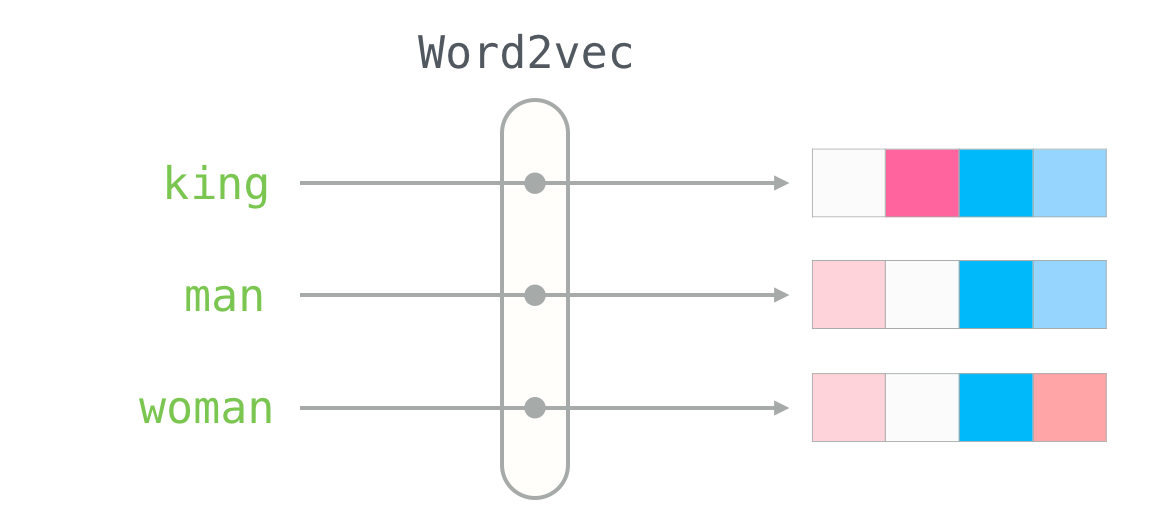

Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

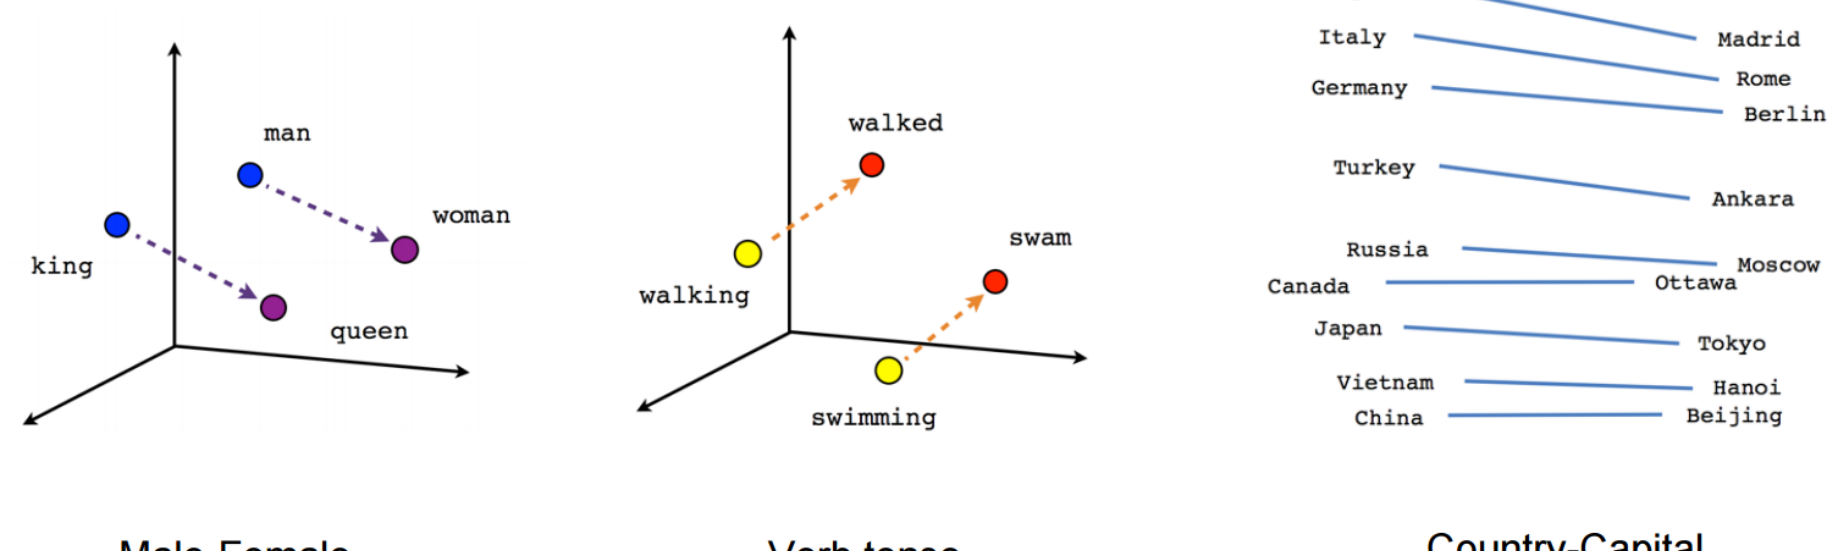

## How to get `word2vec` 
- Use Deep Learning to train your own data and model
- Use SpaCy to get pretrained model

## Word Vectors with Spacy

https://github.com/explosion/spaCy

https://spacy.io/usage/vectors-similarity

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. 

`python -m spacy download en_core_web_lg`

`en_vectors_web_lg`, which includes over 1 million unique vectors

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 

  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=97b4ff94ff9cc379cd19b57542fd20304c014531a7086e448eb8ef7487e7fcfb
  Stored in directory: /tmp/pip-ephem-wheel-cache-5v2psv44/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
#data link: https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/moviereviews.tsv

In [ ]:
import spacy

In [ ]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
x = 'king man woman'
doc = nlp(x)

for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

king king 1.0
king man 0.4088461
king woman 0.26556593
man king 0.4088461
man man 1.0
man woman 0.7401745
woman king 0.26556593
woman man 0.7401745
woman woman 1.0


### Model Building

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/moviereviews.tsv', sep = '\t')

In [ ]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git



  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-u9fox6qq
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-u9fox6qq
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.0.3-cp36-none-any.whl size=4437 sha256=8ecbd9dd32c6b96f371904eb8aa799121a3f60d14a82fdd7fe2b6cf776102354
  Stored in directory: /tmp/pip-ephem-wheel-cache-ou21ljt8/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
x = 'you have @text dAta @#this youuuuuuu'
get_clean(x)

'you have text data this you'

In [ ]:
df['review'] = df['review'].apply(lambda x: get_clean(x))

In [ ]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


###`word2vec` Conversion

In [ ]:
x = 'cat dog'
doc = nlp(x)

In [ ]:
doc.vector.shape

(300,)

In [ ]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
get_vec(x)

array([-2.76215017e-01,  1.73051000e-01, -1.06199495e-01, -2.87514985e-01,
       -6.71409965e-02,  3.10755014e-01, -1.97300002e-01, -2.83794999e-01,
        9.76060033e-02,  1.66744995e+00, -6.34269953e-01,  9.63025019e-02,
       -6.48334980e-01,  1.21810503e-01, -2.99584985e-01,  2.50550002e-01,
        2.70019501e-01,  1.12965000e+00, -1.50799975e-02, -3.55899990e-01,
       -3.66439998e-01, -6.04224950e-02,  5.51749915e-02, -3.11755002e-01,
        3.66990000e-01, -1.74511507e-01, -3.25464994e-01, -4.03584987e-01,
        2.28844002e-01, -1.20778494e-01, -6.23224974e-01,  6.32480010e-02,
       -1.10113002e-01,  4.38295007e-01,  3.05490017e-01,  6.75000250e-03,
        5.48135042e-01, -8.55714977e-01, -1.13398999e-01,  1.28289998e-01,
        2.71515012e-01,  1.46710008e-01, -1.70319498e-01, -3.54690015e-01,
        2.79549956e-02, -1.16696998e-01, -4.24840003e-01,  2.22696498e-01,
       -4.93499637e-03, -2.17053995e-01,  1.82810009e-01,  9.06850100e-02,
        1.11986503e-01,  

In [ ]:
df['vec'] = df['review'].apply(lambda x: get_vec(x))

In [ ]:
df.head()

,label,review,vec
0,neg,how do films like mouse hunt get into theatres...,"[-0.024749208, 0.05506309, -0.1091559, -0.0209..."
1,neg,some talented actresses are blessed with a dem...,"[-0.019058693, 0.12158083, -0.13186473, -0.019..."
2,pos,this has been an extraordinary year for austra...,"[0.015986972, 0.11240393, -0.07701142, -0.0179..."
3,pos,according to hollywood movies made in last few...,"[0.024487527, 0.07351024, -0.062370826, -0.040..."
4,neg,my first press screening of 1998 and already i...,"[0.016009036, 0.06971446, -0.116456516, -0.027..."


In [ ]:
# what do you do when your model is being trained???

In [ ]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [ ]:
X.shape

(2000, 1)

In [ ]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [ ]:
X.shape

(2000, 300)

In [ ]:
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((1600, 300), (400, 300))

### Train ML Model

In [ ]:
clf = LogisticRegression(solver='liblinear')

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.75      0.80      0.77       200
         pos       0.79      0.73      0.76       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('w2v_sentiment.pkl', 'wb'))

In [ ]:
model = pickle.load(open('w2v_sentiment.pkl', 'rb'))

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x = 'this was really a $%good movie'

x = get_clean(x)
vec = get_vec(x)
vec

array([-8.64375010e-02,  2.03543141e-01, -8.56069997e-02, -2.35399976e-02,
        8.52973387e-02,  7.79276714e-02,  4.33751643e-02, -4.62763309e-01,
        5.36908358e-02,  2.42433333e+00, -1.84253335e-01,  9.41810012e-02,
        1.41268149e-01, -2.44086725e-03, -2.29101658e-01, -1.84795424e-01,
       -7.31567061e-03,  9.96933281e-01, -2.31155679e-01, -1.04433426e-03,
       -3.83930020e-02, -3.24846715e-01,  1.39068335e-01,  1.87539998e-02,
       -2.02641636e-02,  1.74961329e-01, -4.77533676e-02, -1.87537983e-01,
       -6.40466586e-02, -1.47629842e-01, -3.23046669e-02,  6.44022226e-03,
        5.18165082e-02, -7.04866648e-03,  4.70666820e-03, -1.06669605e-01,
        1.37790412e-01, -7.70291612e-02, -2.75780529e-01, -2.46405005e-01,
        1.54971495e-01,  2.05878317e-01,  8.84184241e-02, -1.61607996e-01,
        2.18816683e-01,  1.47549495e-01, -2.23486677e-01, -3.81355025e-02,
       -1.27872840e-01, -6.67368248e-02, -6.70833513e-02,  2.01637492e-01,
        1.27364829e-01,  

In [ ]:
model.predict(vec.reshape(1, -1))

array(['pos'], dtype=object)

In [ ]:
x

'this was really a good movie'